# Segmentation by Otsu

Segmentation is the task of separating objects contained in an image from the image background. There are several segmentation techniques, but without a doubt thresholding is still one of the most used, as it is simple and fast. The difficulty in segmenting an object by thresholding is finding, automatically, the appropriate threshold value.

The Otsu method is used to help in the automatic choice of thresholds for segmentation by thresholding. The algorithm assumes that the image contains 2 classes of pixels (object pixels; background pixels). From this, it computes an optimal threshold to separate these classes so that the intra-class variance is minimum and the inter-class variance is maximum.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os


In [2]:
def otsu(f):
     n = np.product(np.shape(f))
     h = 1.*np.bincount(f.ravel()) / n  
     if len(h) == 1: return 1,1
     x = np.arange(np.product(np.shape(h)))
     w0 = np.cumsum(h)
     w1 = 1 - w0
     eps = 1e-10
     m0 = np.cumsum(x * h) / (w0 + eps)
     mt = m0[-1]
     m1 = (mt - m0[0:-1]*w0[0:-1]) / w1[0:-1]
     sB2 = w0[0:-1] * w1[0:-1] * ((m0[0:-1] - m1)**2)
     t = np.argmax(sB2)
     v = sB2[t]
     st2 = sum((x-mt)**2 * h)
     eta = v / st2
     return t, eta

[17658  1757  1322  1216   956  2499  5811 12333 17007  4977]
t= 108


Text(0.5, 1.0, 'image Historam')

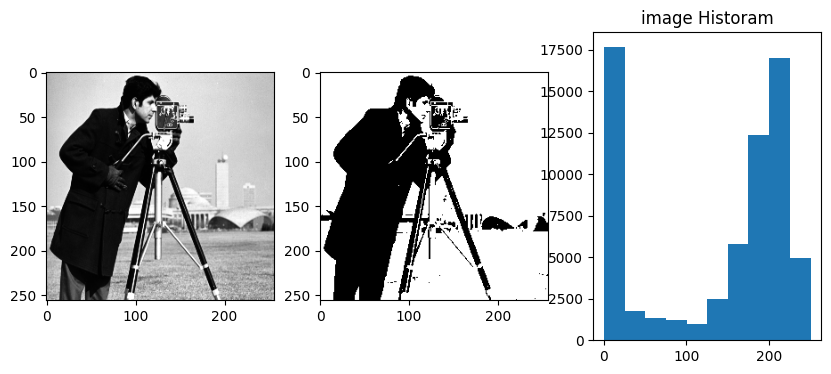

In [3]:
f = mpimg.imread('../figures/cameraman.tif')

t,c = otsu(f)
g = f > t

nbins = 10
h, bin_edges = np.histogram(f)
print(h)
w=255./nbins
bin_centers = bin_edges[1:]-(w/2)


#x = np.zeros(h.size)
#x[t] = h.max()

print('t=',t)

plt.figure(1,(10,4))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.bar(bin_centers, h, width=w)
plt.title('image Historam')


### Links

- [Demo Otsu](../master/otsudemo.ipynb)
- [Otsu wikipedia](https://en.wikipedia.org/wiki/Otsu's_method)